# Meta/Facebook - Rotten Tomatoes Movies Rating Prediction

### Contents
* [Assignment](#Assignment)
* [Data Description](#Data-Description)
* [First Approach: Predicting Movie Status Based on Numerical and Categorical Features](#First-Approach:-Predicting-Movie-Status-Based-on-Numerical-and-CategoricalFeatures)
  * [Data Preprocessing](#Data-Preprocessing)
  * [Decision Tree Classifier](#Decision-Tree-Classifier)
  * [Random Forest Classifier](#Random-Forest-Classifier)

### Assignment
In this project, you are given large datasets from Rotten Tomatoes - a popular online review aggregator for film and television. Your task is to build a high performing classification algorithm to predict whether a particular movie on Rotten Tomatoes is labeled as 'Rotten', 'Fresh', or 'Certified-Fresh'.

There are two approaches that we're going to learn to predict a movie's status in this data project:

* by using numerical and categorical features
* by using text data (review from the critics)

### Data Description

There are 2 datasets

1. **rotten_tomatoes_movies.csv -** contains basic information about each movie listed on Rotten Tomatoes; each row represents one movie;
2. **rotten_tomatoes_critic_reviews_50k.tsv -** contains 50.000 individual reviews by Rotten Tomatoes critics; each row represents one review corresponding to a movie;

**rotten_tomatoes_movies dataset contains the following columns:**

rotten_tomatoes_link - movie ID


movie_title - title of the movie as displayed on the Rotten Tomatoes website


movie_info - brief description of the movie


critics_consensus - comment from Rotten Tomatoes


content_rating - category based on the movie suitability for audience


genres - movie genres separated by commes, if multiple


directors - name of director(s)


authors - name of author(s)


actors - name of actors


original_release_date - date in which the movie has been released in theatres, in YYY-MM-DD format


streaming_release_date - date in which the movie has been released on streaming platforms, in YYY-MM-DD format


runtime - duration of the movie in minutes


production_company - name of a studio/company that produced the movie


tomatometer_status - a label assgined by Rotten Tomatoes: "Fresh", "Certified-Fresh" or "Rotten"; **this is the target variables in this challenge**


tomatometer_rating - percentage of positive critic ratings


tomatometer_count - critic ratings counted for the calculation of the tomatomer status


audience_status - a label assgined based on user ratings: "Spilled" or "Upright"


audience_rating - percentage of positive user ratings


audience_count - user ratings counted for the calculation of the audience status


tomatometer_top_critics_count - number of ratings by top critics


tomatometer_fresh_critics_count - number of critic ratings labeled "Fresh"


tomatometer_rotten_critics_count - - number of critic ratings labeled "Rotten"


**rotten_tomatoes_critic_reviews_50k dataset contains the following columns:**

rotten_tomatoes_link - movie ID


critic_name - name of critic who rated the movie


top_critic - boolean value that clarifies whether the critic is a top critic or not


publisher_name - name of the publisher for which the critic works


review_type - was the review labeled "Fresh" or "Rotten"?


review_score - review score provided by the critic


review_date - date of the review in YYYY-MM-DD format


review_content - text of the review

### First Approach: Predicting Movie Status Based on Numerical and Categorical Features

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
movies = pd.read_csv('rotten_tomatoes_movies.csv')
movies.head(3)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19
2,m/10,10,"A successful, middle-aged Hollywood songwriter...",Blake Edwards' bawdy comedy may not score a pe...,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,...,Waner Bros.,Fresh,67.0,24.0,Spilled,53.0,14684.0,2,16,8


In [3]:
movies.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
count,17398.000000,17668.000000,17668.000000,17416.000000,1.741500e+04,17712.000000,17712.000000,17712.000000
mean,102.214048,60.884763,57.139801,60.554260,1.439401e+05,14.586326,36.374831,20.703139
std,18.702511,28.443348,68.370047,20.543369,1.763577e+06,15.146349,52.601038,30.248435
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,45.000000,7.075000e+02,3.000000,6.000000,3.000000
50%,99.000000,67.000000,28.000000,63.000000,4.277000e+03,8.000000,16.000000,8.000000
75%,111.000000,86.000000,75.000000,78.000000,2.498800e+04,23.000000,44.000000,24.000000
max,266.000000,100.000000,574.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000


### Data Preprocessing

Content Rating Category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC17']


[Text(0, 0, '6377'),
 Text(0, 0, '5474'),
 Text(0, 0, '2979'),
 Text(0, 0, '2168'),
 Text(0, 0, '676'),
 Text(0, 0, '38')]

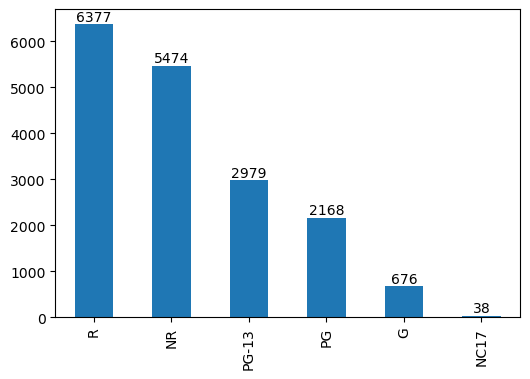

In [4]:
print(f'Content Rating Category: {movies.content_rating.unique()}')

ax = movies.content_rating.value_counts().plot(kind = 'bar', figsize = (6,4))

ax.bar_label(ax.containers[0])

In [5]:
content_rating = pd.get_dummies(movies['content_rating'])
content_rating.head(3)

,G,NC17,NR,PG,PG-13,R
0,0,0,0,1,0,0
1,0,0,0,0,0,1
2,0,0,0,0,0,1


Audience Status: ['Spilled' 'Upright' nan]


[Text(0, 0, '9390'), Text(0, 0, '7874')]

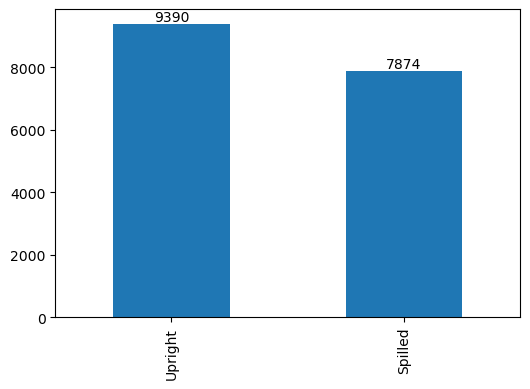

In [6]:
print(f'Audience Status: {movies.audience_status.unique()}')

ax = movies.audience_status.value_counts().plot(kind = 'bar', figsize = (6,4))

ax.bar_label(ax.containers[0])

In [7]:
audience_status = pd.DataFrame(movies['audience_status'].replace(['Spilled', 'Upright'], [0,1]))
audience_status.head(3)

,audience_status
0,0.0
1,1.0
2,0.0


In [8]:
tomatometer_status = pd.DataFrame(movies['tomatometer_status'].replace(['Rotten', 'Fresh', 'Certified-Fresh'],
                                                                      [0,1,2]))
tomatometer_status.head(3)

,tomatometer_status
0,0.0
1,2.0
2,1.0


In [9]:
movies.head(1)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76


In [10]:
df_features = pd.concat([movies[['runtime', 'tomatometer_rating', 'tomatometer_count', 'audience_rating',
                                'audience_count', 'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count',
                                'tomatometer_rotten_critics_count']], 
                         content_rating, audience_status, tomatometer_status], axis = 1).dropna()

df_features.head(3)

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
0,119.0,49.0,149.0,53.0,254421.0,43,73,76,0,0,0,1,0,0,0.0,0.0
1,90.0,87.0,142.0,64.0,11574.0,44,123,19,0,0,0,0,0,1,1.0,2.0
2,122.0,67.0,24.0,53.0,14684.0,2,16,8,0,0,0,0,0,1,0.0,1.0


In [11]:
df_features.describe()

,runtime,tomatometer_rating,tomatometer_count,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count,G,NC17,NR,PG,PG-13,R,audience_status,tomatometer_status
count,17017.000000,17017.000000,17017.000000,17017.000000,1.701700e+04,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000,17017.000000
mean,102.296233,60.519539,57.097197,60.324499,1.471183e+05,14.765999,36.237292,20.871188,0.039314,0.002174,0.294940,0.124993,0.171593,0.366986,0.542928,0.752718
std,18.653649,28.436397,66.814580,20.480600,1.783955e+06,15.172256,51.362454,29.978900,0.194346,0.046580,0.456029,0.330720,0.377037,0.481997,0.498168,0.747250
min,5.000000,0.000000,5.000000,0.000000,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.000000,38.000000,12.000000,44.000000,7.410000e+02,3.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,99.000000,66.000000,29.000000,62.000000,4.423000e+03,8.000000,17.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,111.000000,86.000000,76.000000,77.000000,2.606700e+04,23.000000,44.000000,24.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,266.000000,100.000000,535.000000,100.000000,3.579764e+07,69.000000,497.000000,303.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000


[Text(0, 0, '7375'), Text(0, 0, '6475'), Text(0, 0, '3167')]

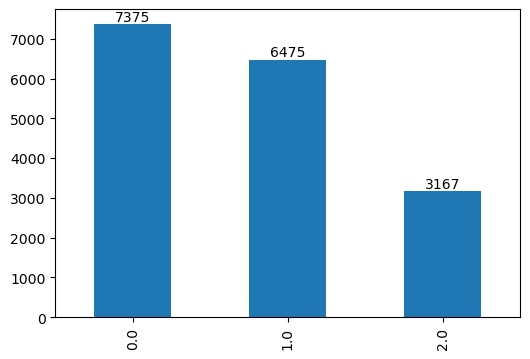

In [12]:
ax = df_features['tomatometer_status'].value_counts().plot(kind = 'bar', figsize = (6,4))
ax.bar_label(ax.containers[0])

It turns out that in our final DataFrame, we have 7375 movies classified as Rotten(encoded as 0), 6475 movies classified as 'Fresh' (encoded as 1), and only 3167 movies classified as 'Certified-Fresh' (encoded as 2). Thus, it looks like we have a class imbalance problem in this case. We will deal with this later.

In [13]:
from sklearn.model_selection import train_test_split

X = df_features.drop(['tomatometer_status'], axis = 1)
y = df_features['tomatometer_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f'Size of training data is {len(X_train)} and the size of test data is {len(X_test)}')

Size of training data is 13613 and the size of test data is 3404


### Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix, classification_report, confusion_matrix, accuracy_score

In [42]:
# Instantiate Decision Tree Classifier with max_leaf_nodes = 3
tree_3_leaf = DecisionTreeClassifier(max_leaf_nodes = 3, random_state = 42)

# Train the classifier on the training data
tree_3_leaf.fit(X_train, y_train)

# Predict the test data with trained tree classifier

y_predict = tree_3_leaf.predict(X_test)

# Print the accuracy and classification report on test data
print('Accuracy Score :',accuracy_score(y_test, y_predict).round(2), '%')
print('')
print('Decision Tree 3 Leaf Report ')
print('')
print(classification_report(y_test, y_predict))

Accuracy Score : 0.95 %

Decision Tree 3 Leaf Report 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.97      0.88      0.93      1286
         2.0       0.80      0.95      0.87       630

    accuracy                           0.95      3404
   macro avg       0.92      0.94      0.93      3404
weighted avg       0.95      0.95      0.95      3404



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


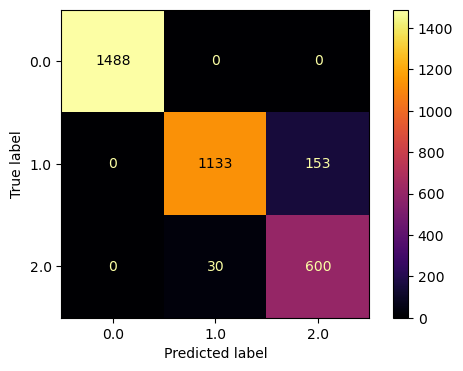

In [34]:
# Plot confusion matrix on test data
fig, ax = plt.subplots(figsize = (6,4))

plot_confusion_matrix(tree_3_leaf, X_test, y_test, cmap = 'inferno', ax = ax)

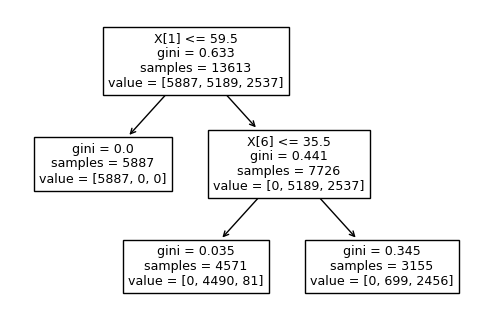

In [35]:
fig, ax = plt.subplots(figsize=(6, 4))

plot_tree(tree_3_leaf, ax= ax)

plt.show()

* If a data point has tomatometer_rating below or equals to 59.5, then that data point will be labeled as 0, which is the encoding representation of 'Rotten'. If not, then a data point goes to the next branch.

* In the second branch, our decision tree classifier uses the feature with index 6 in our df_feature DataFrame, which is tomatometer_fresh_critics_count to classify the remaining data points. If a data point has tomatometer_fresh_critics_count less than or equal to 35.5, then it will be labeled as 1, which is the encoding representation of 'Fresh', otherwise, it will be labeled as 2 or 'Certified-Fresh'.

If a movie has a tomatometer_rating above 59.5, then the model needs to take a look at several features to find out whether a movie is 'Fresh' or 'Certified-Fresh'. If you take a look at the Rotten Tomatoes homepage, there are several considerations that need to be taken into account for a movie to be considered as 'Certified-Fresh' instead of just 'Fresh', such as:

    * A consistent Tomatometer score of at least 75%
    * At least 5 reviews from Top Critics
    * Films in wide release must have a minimum of 80 reviews

As you can see, several variables need to be taken into account to distinctively classify whether a movie is 'Fresh' or 'Certified-Fresh'. Since we constrained our Decision Tree model, then it uses the number of top critics' review as the sole variable to classify whether a movie is 'Fresh' or 'Certified-Fresh'

Now that we know how a decision tree classifies each data point, let's try to optimize the accuracy score by removing the maximum leaf nodes constraint that we have set in the beginning.


In [41]:
# Instantiate Decision Tree Classifier with default hyperparameter settings
tree = DecisionTreeClassifier(random_state = 42)

# Train the classifier on the training data
tree.fit(X_train, y_train)

# Predict the test data with trained tree classifier

y_predict = tree.predict(X_test)

# Print the accuracy and classification report on test data
print('Accuracy Score :', accuracy_score(y_test, y_predict).round(2), '%')
print('')
print('Decision Tree 3 Leaf Report ')
print('')
print(classification_report(y_test, y_predict))

Accuracy Score : 0.99 %

Decision Tree 3 Leaf Report 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.97      0.98      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


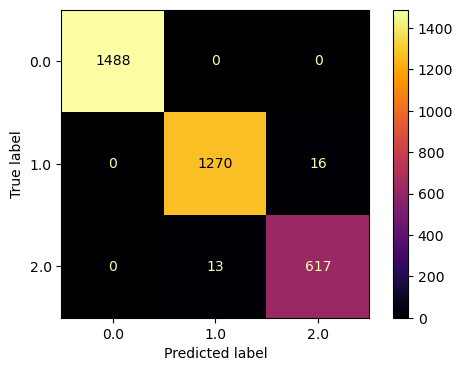

In [37]:
# Plot confusion matrix on test data
fig, ax = plt.subplots(figsize = (6,4))

plot_confusion_matrix(tree, X_test, y_test, cmap = 'inferno', ax = ax)

And the accuracy as well as precision and recall value of our classifier is getting better now, as our classifier now achieves an accuracy of 99% after previously it was 95%. That means our classifier performs better when we let it decide the optimum number of the leaf nodes by itself.

### Random Forest Classifier

In [44]:
from sklearn.ensemble import RandomForestClassifier

In [45]:
# Instantiate Random Forest Classifier
random_forest = RandomForestClassifier(random_state=2)

# Train Random Forest Classifier on training data
random_forest.fit(X_train, y_train)

# Predict test data with trained model
y_predict = random_forest.predict(X_test)

# Print accuracy score and classification report
print('Accuracy Score :', accuracy_score(y_test, y_predict).round(2), '%')
print('')
print('Decision Tree 3 Leaf Report ')
print('')
print(classification_report(y_test, y_predict))

Accuracy Score : 0.99 %

Decision Tree 3 Leaf Report 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1488
         1.0       0.99      0.99      0.99      1286
         2.0       0.98      0.97      0.98       630

    accuracy                           0.99      3404
   macro avg       0.99      0.99      0.99      3404
weighted avg       0.99      0.99      0.99      3404



/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


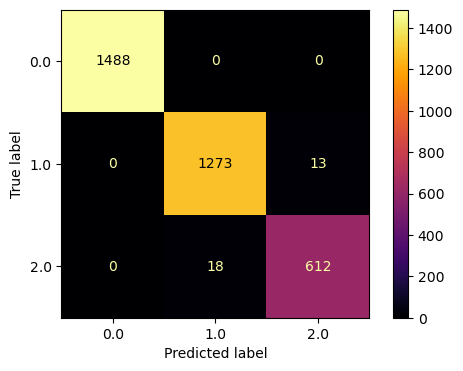

In [47]:
# Plot confusion matrix
fig, ax = plt.subplots(figsize=(6, 4))


plot_confusion_matrix(random_forest, X_test, y_test, cmap ='inferno', ax=ax)